<a href="https://colab.research.google.com/github/marudengi/practice-for-kaggle/blob/main/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Files**

In [1]:
pwd

'/content'

In [2]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"seongsoohyeon","key":"6a52675cdb2f4ee3e2c1cb05a44ea6b7"}'}

In [3]:
ls

kaggle.json  sample_data/


In [4]:
pwd

'/content'

In [5]:
ls -1ha kaggle.json

kaggle.json


In [6]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
ls

kaggle.json  sample_data/


In [9]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         96           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        205           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        467           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       3201           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      25650            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       6453            True  
connectx

In [10]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 49.7MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 13.7MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 60.9MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 73.5MB/s]


In [ ]:
!ls

data_description.txt  sample_data	     test.csv
kaggle.json	      sample_submission.csv  train.csv


# **1. Import**

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
%matplotlib inline

1.  **Import Dataset & Preprocessing**



In [19]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [20]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [21]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [22]:
y_train = train['SalePrice']
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [23]:
X_train = train.loc[:,:'SaleCondition']
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Un

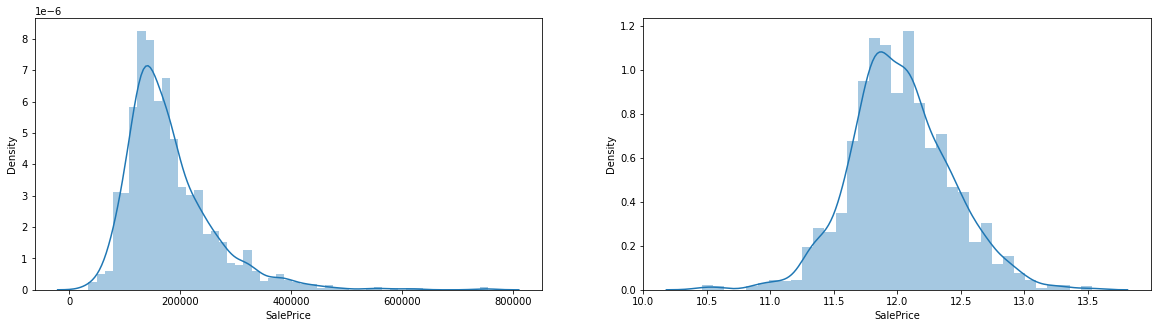

In [24]:
f, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(train['SalePrice'],ax=ax[0])
sns.distplot(np.log(train['SalePrice']), ax=ax[1])
plt.show()

continuous target data can be converted by log data

# **2. Fill NA**

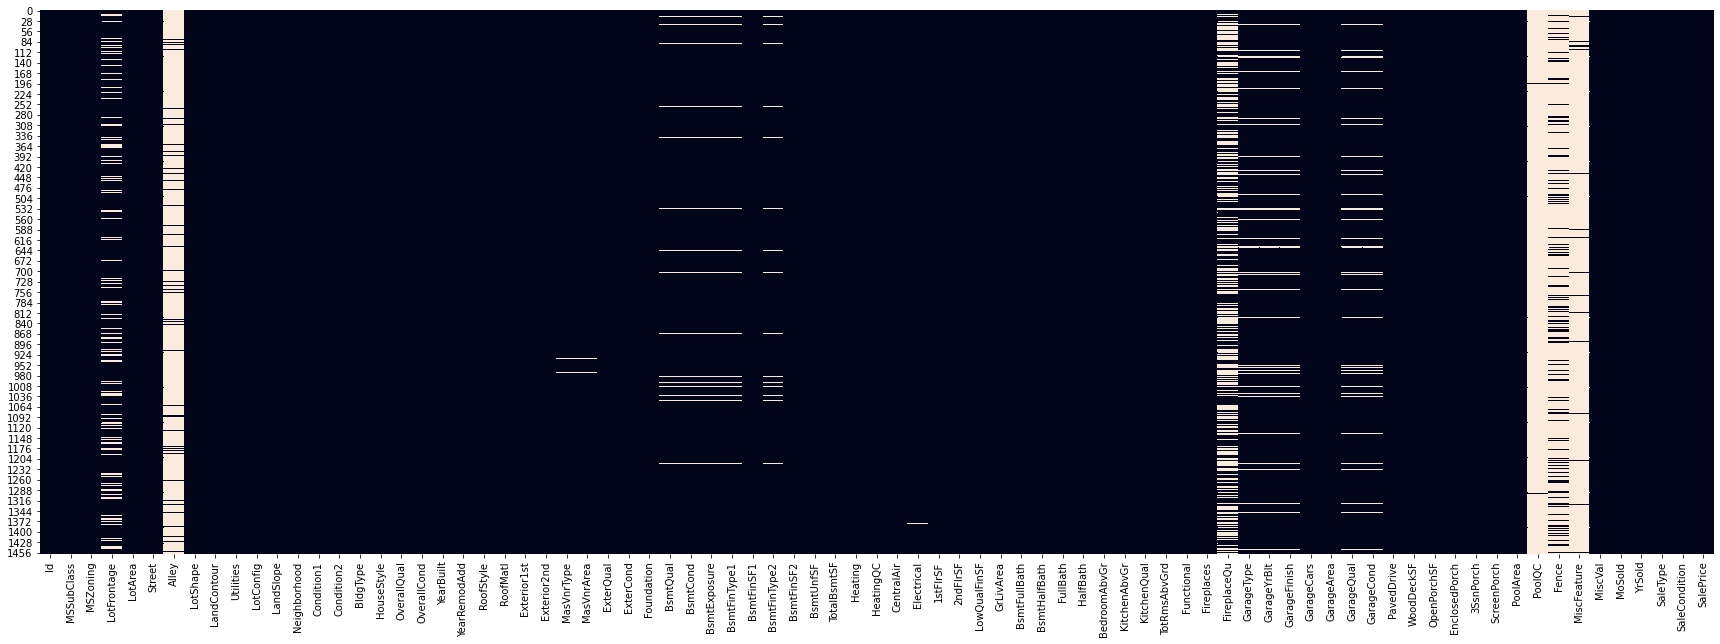

In [25]:
#uniform_data = np.random.rand(train.index.shape[0],train.columns.shape[0])
f, ax = plt.subplots(1,1,figsize=(30,10))
sns.heatmap(train.isnull(),cbar=False)
plt.show()

Missing values : LotFrontage, Alley, 

MasVnrType, MasVnrArea, 

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1,BsmtFinType2, 

Electrical,

FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, 

PoolQC, Fence, MiscFeature

In [26]:
def Nasum(df):
  for idx, col in enumerate(df):

    print('{0: >13} {1}'.format(col, df[col].isnull().sum()))

In [27]:
Nasum(train)

           Id 0
   MSSubClass 0
     MSZoning 0
  LotFrontage 259
      LotArea 0
       Street 0
        Alley 1369
     LotShape 0
  LandContour 0
    Utilities 0
    LotConfig 0
    LandSlope 0
 Neighborhood 0
   Condition1 0
   Condition2 0
     BldgType 0
   HouseStyle 0
  OverallQual 0
  OverallCond 0
    YearBuilt 0
 YearRemodAdd 0
    RoofStyle 0
     RoofMatl 0
  Exterior1st 0
  Exterior2nd 0
   MasVnrType 8
   MasVnrArea 8
    ExterQual 0
    ExterCond 0
   Foundation 0
     BsmtQual 37
     BsmtCond 37
 BsmtExposure 38
 BsmtFinType1 37
   BsmtFinSF1 0
 BsmtFinType2 38
   BsmtFinSF2 0
    BsmtUnfSF 0
  TotalBsmtSF 0
      Heating 0
    HeatingQC 0
   CentralAir 0
   Electrical 1
     1stFlrSF 0
     2ndFlrSF 0
 LowQualFinSF 0
    GrLivArea 0
 BsmtFullBath 0
 BsmtHalfBath 0
     FullBath 0
     HalfBath 0
 BedroomAbvGr 0
 KitchenAbvGr 0
  KitchenQual 0
 TotRmsAbvGrd 0
   Functional 0
   Fireplaces 0
  FireplaceQu 690
   GarageType 81
  GarageYrBlt 81
 GarageFinish 81
   Garage

## 2.1 LotFrontage with LotArea




In [28]:
train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

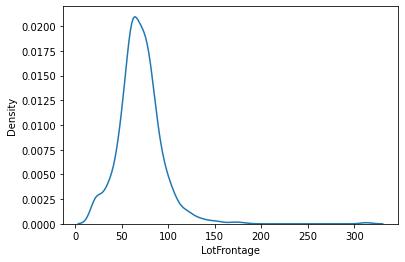

In [29]:
f,ax =plt.subplots()
sns.kdeplot(train['LotFrontage'])

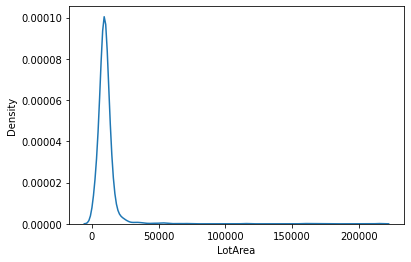

In [30]:
f,ax =plt.subplots()
sns.kdeplot(train['LotArea'])

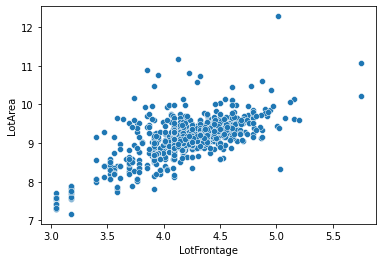

In [31]:
f, ax = plt.subplots()
sns.scatterplot(np.log(train['LotFrontage']),np.log(train['LotArea']))
plt.show()

In [32]:
train = pd.read_csv('train.csv')

In [33]:
train['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [34]:
math.e**np.log(train['LotArea']/130)

0        65.000000
1        73.846154
2        86.538462
3        73.461538
4       109.692308
           ...    
1455     60.900000
1456    101.346154
1457     69.553846
1458     74.746154
1459     76.438462
Name: LotArea, Length: 1460, dtype: float64

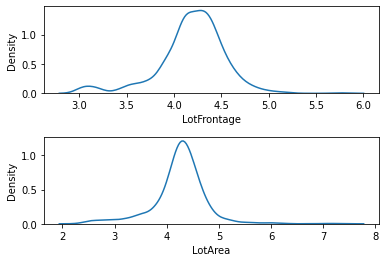

In [35]:
f, ax = plt.subplots(2,1)
plt.subplots_adjust(wspace=0.5,hspace=0.5)
sns.kdeplot(np.log(train['LotFrontage']),ax=ax[0])
sns.kdeplot(np.log(train['LotArea']/130),ax=ax[1])
plt.show()

LotFrontage and LotArea have a similar relationship

In [36]:
for idx, val in enumerate(train['LotFrontage']):
  if math.isnan(val):
    train.loc[idx,'LotFrontage'] = math.e**np.log(train.loc[idx,'LotArea']/130)

In [37]:
train['LotFrontage'].isna().sum()

0

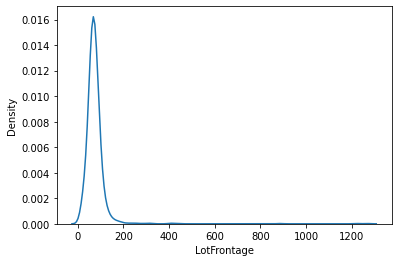

In [38]:
f, ax = plt.subplots()
sns.kdeplot(train['LotFrontage'])
plt.show()



## 2.2 Alley with street 



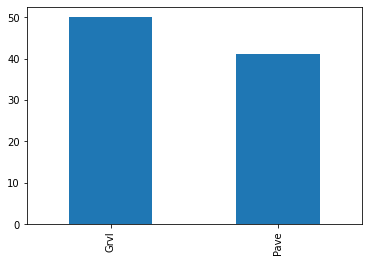

In [39]:
train['Alley'].value_counts().plot.bar()
plt.show()

In [40]:
train['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [41]:
train.loc[:,['Alley','Street']].value_counts()

Alley  Street
Grvl   Pave      50
Pave   Pave      41
dtype: int64

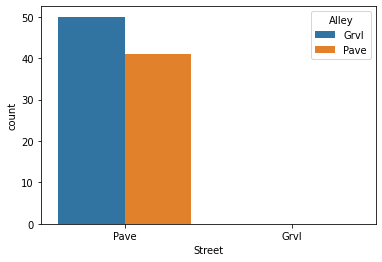

In [42]:
f, ax = plt.subplots()
sns.countplot(train['Street'],hue=train['Alley'])

Most of street is Pave

In [43]:
train['Alley'].fillna('Pave',inplace = True)

In [44]:
train['Alley'].isna().sum()

0

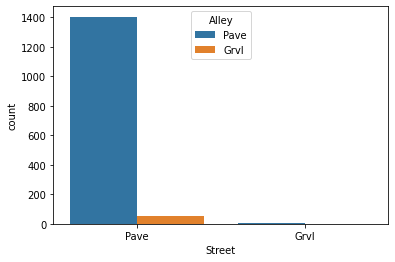

In [45]:
f, ax = plt.subplots()
sns.countplot(train['Street'],hue=train['Alley'])

## 2.3 MasVnrType and MasVnrArea

In [46]:
train = pd.read_csv('train.csv')

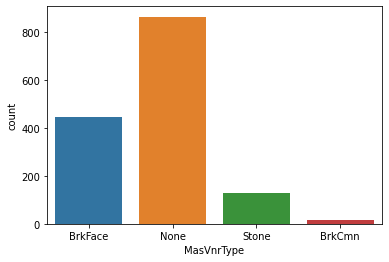

In [47]:
sns.countplot(train['MasVnrType'])

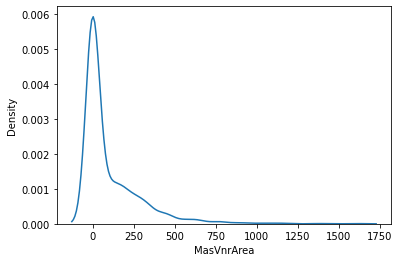

In [48]:
sns.kdeplot(train['MasVnrArea'])

In [49]:
train['MasVnrArea'].isna().sum()

8

In [50]:
train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [51]:
train['MasVnrType'].isna().sum()

8

In [52]:
for idx, val in enumerate(train['MasVnrType']):
  if str(val) == 'nan':
    print(idx, train.loc[idx,'Exterior1st'])

234 VinylSd
529 Wd Sdng
650 CemntBd
936 VinylSd
973 CemntBd
977 VinylSd
1243 VinylSd
1278 VinylSd


In [53]:
train['Exterior1st']

0       VinylSd
1       MetalSd
2       VinylSd
3       Wd Sdng
4       VinylSd
         ...   
1455    VinylSd
1456    Plywood
1457    CemntBd
1458    MetalSd
1459    HdBoard
Name: Exterior1st, Length: 1460, dtype: object

In [54]:
train['MasVnrType'].groupby(train['Exterior1st']).value_counts()

Exterior1st  MasVnrType
AsbShng      None           18
             BrkFace         1
             Stone           1
AsphShn      None            1
BrkComm      None            2
BrkFace      None           49
             Stone           1
CBlock       None            1
CemntBd      None           30
             Stone          17
             BrkFace        12
HdBoard      BrkFace       110
             None          102
             Stone           7
             BrkCmn          3
ImStucc      None            1
MetalSd      None          155
             BrkFace        58
             Stone           5
             BrkCmn          2
Plywood      None           61
             BrkFace        43
             Stone           3
             BrkCmn          1
Stone        None            2
Stucco       None           20
             BrkFace         3
             BrkCmn          1
             Stone           1
VinylSd      None          240
             BrkFace       177
             St

In [55]:
train['MasVnrArea'].groupby(train['Exterior1st']).value_counts()['Plywood'].median()

1.0

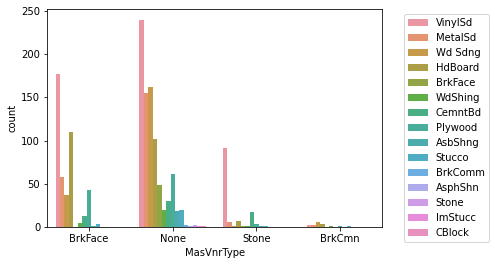

In [56]:
f, ax = plt.subplots()
sns.countplot(x = train['MasVnrType'], hue=train['Exterior1st'])
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

Most of materials are used in None(MasVnrType)

Filling nan to 'None' is comfortable Now but for reusability make a function for most used materials in MasVnrType

In [57]:
def most_used_material_1(df,feature1,feature2,col):
  return df[feature1].groupby(train[feature2]).value_counts()[col].index[0]

In [58]:
def most_used_material_2(df,feature1,feature2,col):
  return df[feature1].groupby(train[feature2]).value_counts()[col].median()

In [59]:
for idx, val in enumerate(train['MasVnrType']):
  if str(val) == 'nan':
    train.loc[idx,'MasVnrType'] = most_used_material_1(train,'MasVnrType','Exterior1st',train.loc[idx,'Exterior1st'])

In [60]:
for idx, val in enumerate(train['MasVnrArea']):
  if str(val) == 'nan':
    train.loc[idx,'MasVnrArea'] =most_used_material_2(train,'MasVnrArea','Exterior1st',train.loc[idx,'Exterior1st'])

In [61]:
train['MasVnrType'].isna().sum()

0

In [62]:
train['MasVnrArea'].isna().sum()

0

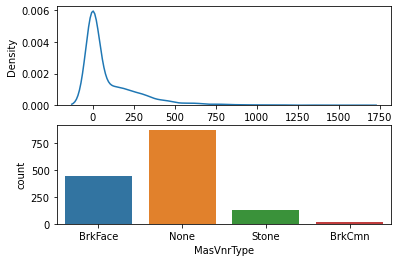

In [63]:
f,ax = plt.subplots(2,1)
sns.kdeplot(train['MasVnrArea'],ax=ax[0])
sns.countplot(train['MasVnrType'],ax=ax[1])
plt.show()

## 2.4 BsmtFinType1 BsmtFinType2

In [67]:
train['BsmtFinType1'].isna().sum()

37

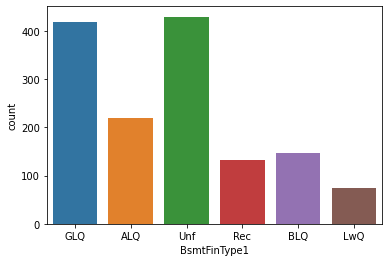

In [68]:
sns.countplot(train['BsmtFinType1'])

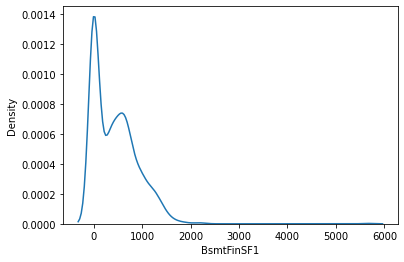

In [69]:
sns.kdeplot(train['BsmtFinSF1'])

In [70]:
train['BsmtFinSF1'].groupby(train['BsmtFinType1']).value_counts().index

MultiIndex([('ALQ',  384),
            ('ALQ',  569),
            ('ALQ',  247),
            ('ALQ',  285),
            ('ALQ',  311),
            ('ALQ',  351),
            ('ALQ',  375),
            ('ALQ',  387),
            ('ALQ',  403),
            ('ALQ',  513),
            ...
            ('Rec', 1000),
            ('Rec', 1018),
            ('Rec', 1040),
            ('Rec', 1046),
            ('Rec', 1110),
            ('Rec', 1159),
            ('Rec', 1213),
            ('Rec', 1219),
            ('Rec', 1332),
            ('Unf',    0)],
           names=['BsmtFinType1', 'BsmtFinSF1'], length=845)

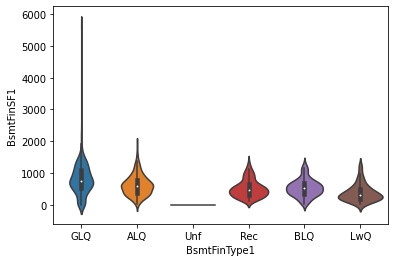

In [71]:
f, ax = plt.subplots()
sns.violinplot(train['BsmtFinType1'],train['BsmtFinSF1'])

Fill BsmtFinType1 Na data for BsmtFinSF1 median data

In [229]:
train['BsmtFinSF1'].groupby(train['BsmtFinType1']).value_counts()

BsmtFinType1  BsmtFinSF1
ALQ           384             3
              569             3
              247             2
              285             2
              311             2
                           ... 
Rec           1159            1
              1213            1
              1219            1
              1332            1
Unf           0             430
Name: BsmtFinSF1, Length: 845, dtype: int64

## func : Fill target_feature with assistant_feature

In [150]:
SF1_median_for_Type1 = {np.median(train['BsmtFinSF1'].groupby(train['BsmtFinType1']).value_counts()[val].index) : val  for idx, val in enumerate(train['BsmtFinType1'].unique()) if str(val) != 'nan'}
SF1_median_for_Type1.items()

dict_items([(788.5, 'GLQ'), (604.5, 'ALQ'), (0.0, 'Unf'), (476.0, 'Rec'), (527.5, 'BLQ'), (325.0, 'LwQ')])

In [224]:
def find_similar_BsmtFinSF1_from_median(num, dic):
  temp = []
  for idx, val in enumerate(dic.keys()):
    temp.append(int(val - num))

  return list(dic.keys())[np.argmin(np.abs(temp))]
  

In [230]:
def fill_bsmtFinType(df,target_feature,assistant_feature):
  for idx, val in enumerate(df[target_feature]):
    if str(val) == 'nan':
      df.loc[idx,target_feature] = SF1_median_for_Type1[find_similar_BsmtFinSF1_from_median(df.loc[idx,assistant_feature], SF1_median_for_Type1)]

In [231]:
fill_bsmtFinType(train,'BsmtFinType1','BsmtFinSF1')

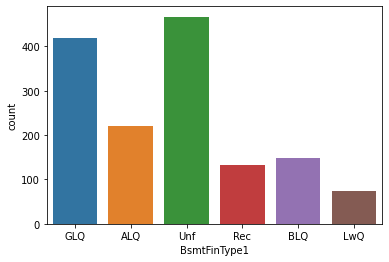

In [234]:
sns.countplot(train['BsmtFinType1'])

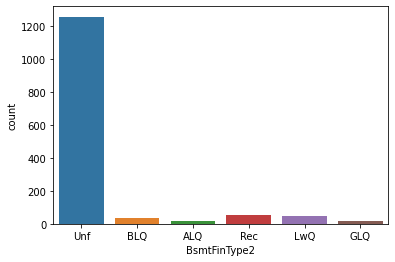

In [235]:
sns.countplot(train['BsmtFinType2'])

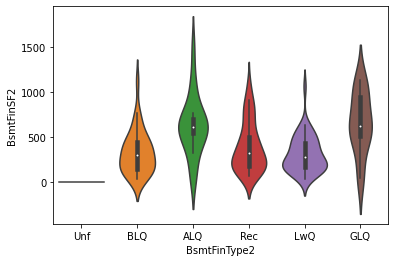

In [237]:
f, ax = plt.subplots()
sns.violinplot(train['BsmtFinType2'],train['BsmtFinSF2'])

In [238]:
fill_bsmtFinType(train,'BsmtFinType2','BsmtFinSF2')

In [239]:
train['BsmtFinType2'].isna().sum()

0

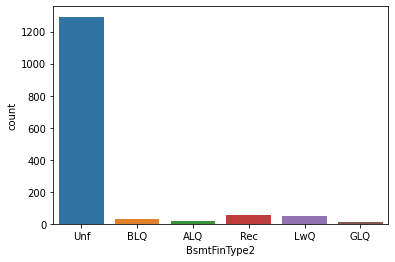

In [240]:
sns.countplot(train['BsmtFinType2'])

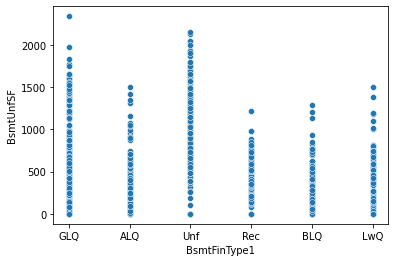

In [248]:
sns.scatterplot(train['BsmtFinType1'],train['BsmtUnfSF'])

In [263]:
train[train['BsmtUnfSF'] > 0]['BsmtFinSF1'].value_counts()

0      430
24      12
16       9
20       5
662      5
      ... 
806      1
808      1
810      1
816      1
630      1
Name: BsmtFinSF1, Length: 607, dtype: int64

## 2.5 BsmtQual and BsmtCond

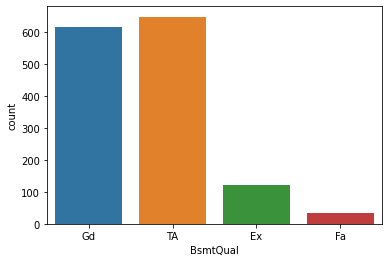

In [242]:
sns.countplot(train['BsmtQual'])

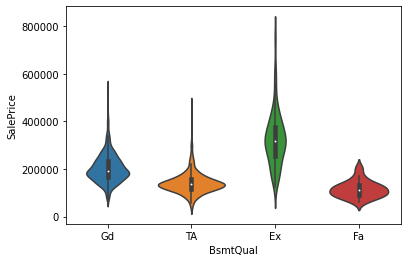

In [271]:
sns.violinplot(train['BsmtQual'], train['SalePrice'])

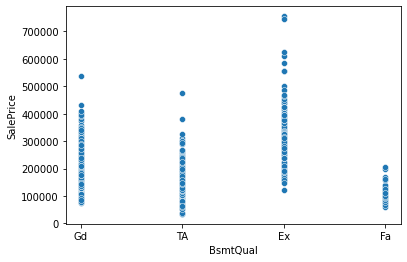

In [244]:
sns.scatterplot(train['BsmtQual'],train['SalePrice'])

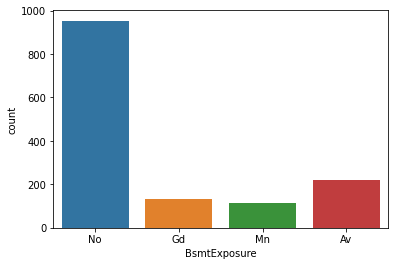

In [245]:
sns.countplot(train['BsmtExposure'])

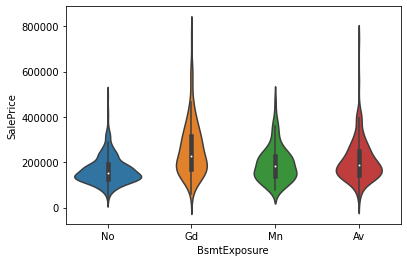

In [247]:
sns.violinplot(train['BsmtExposure'],train['SalePrice'])

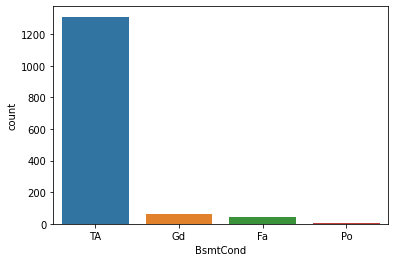

In [243]:
sns.countplot(train['BsmtCond'])

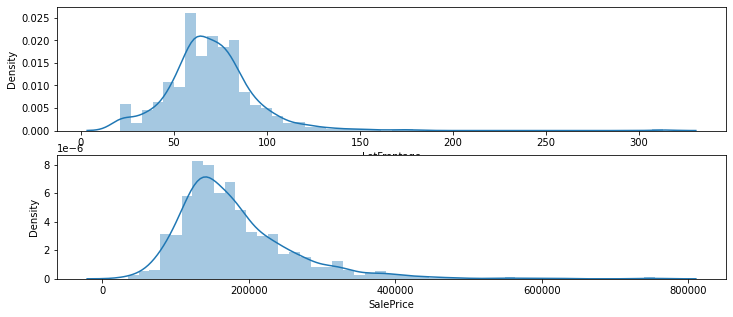

In [236]:
f, ax = plt.subplots(2,1,figsize=(12,5))
sns.distplot(train['LotFrontage'],ax=ax[0])
sns.distplot(train['SalePrice'],ax=ax[1])
plt.show()